# **Laboratorio: Covarianza**

En este laboratorio vamos a explorar el concepto de covarianza y qué información nos da sobre la relación estadística entre dos variables aleatorias a partir de sus observaciones.

## **1. Ecuación de Covarianza**

Recordemos que la covarianza entre las variables aleatorias $X$ y $Y$ está definida como:


$$\text{cov}(X,Y)=E[(X-E[X])(Y-E[Y])].$$


Un estimador de la covarianza entre $X$ y $Y$ a partir de observaciones es:
$$\text{cov}(X,Y)=\frac{1}{N-1}\sum_{i}^N (x^{(i)}-\mu_x)(y^{(i)}-\mu_y),$$
donde $x^{(i)}$ y $y^{(i)}$ son las observaciones de $X$ y $Y$, y $N$ es la cantidad de observaciones. Los valores $\mu_x$ y $\mu_y$ corresponden a la estimación del valor esperado de $X$ y $Y$.

## **1. Ejemplos con datos sintéticos**

En primer lugar, vamos a generar tres conjuntos de datos generados de forma sintética y a explorar su covarianza.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

eje_x = np.random.randn(500)

#Set 1
data_y = np.random.randn(500)

#Set 2
data_y2 = 2* eje_x+ np.random.randn(500)

#Set 3
data_y3 = -2*eje_x + np.random.randn(500)

## **2.1 Ejemplo 1:**

A continuación se grafica el primer conjunto de datos:

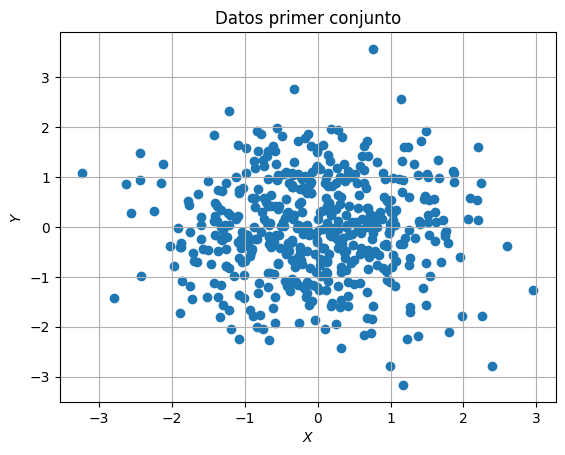

In [2]:
plt.figure()
plt.scatter(eje_x,data_y)
plt.grid()
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.title("Datos primer conjunto")
plt.show()

Numpy nos permite estimar la **matriz de covarianza**, la cual es una matriz simétrica que en su diagonal tiene las varianzas de las variables aleatorias, y fuera de su diagonal tiene las covarianzas entre pares de variables aleatorias. En este caso, como tenemos dos variables aleatorias, la matriz de covarianza es de tamaño $2\times 2$, donde sus posiciones (1,1) y (2,2) corresponden a la estimación de las varianzas de $X$ y $Y$, y la posición (1,2) contiene la covarianza entre estas dos variables aleatorias. A continuación, se calcula la matriz de covarianza de las variables $X$ y $Y$ graficadas usando la función *np.cov* de numpy:

In [3]:
cov_matrix = np.cov(eje_x,data_y)
print(cov_matrix)

[[1.00843284 0.00962312]
 [0.00962312 0.99873119]]


 Note que esta matriz es simétrica. En este caso, la correlación es cercana a 0, ya que, a través de una inspección visual, no existe una tendencia que nos indique alguna relación estadística lineal entre las variables aleatorias.

## **2.2 Ejemplo 2**

A continuación se grafica el segundo set de datos:

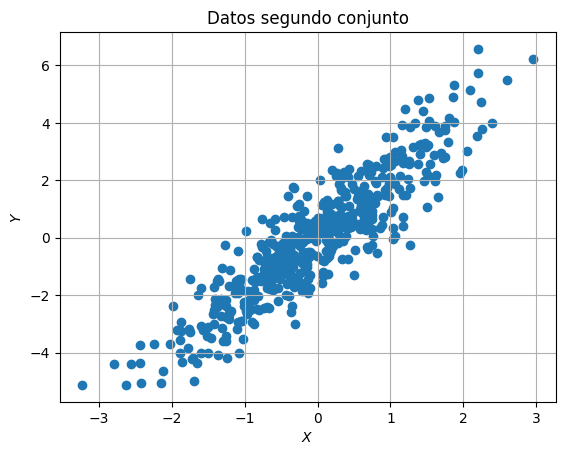

In [4]:
plt.figure()
plt.scatter(eje_x,data_y2)
plt.grid()
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.title("Datos segundo conjunto")
plt.show()


Nuevamente calculamos e imprimimos la matriz de covarianza:

In [5]:
cov_matrix = np.cov(eje_x,data_y2)
print(cov_matrix)

[[1.00843284 1.92545529]
 [1.92545529 4.5071799 ]]


En este caso, la covarianza es positiva dado que la variable $Y$ incrementa a medida que incrementa $Y$.

## **2.3 Ejemplo 3**

Por último, graficamos el tercer conjunto de datos:

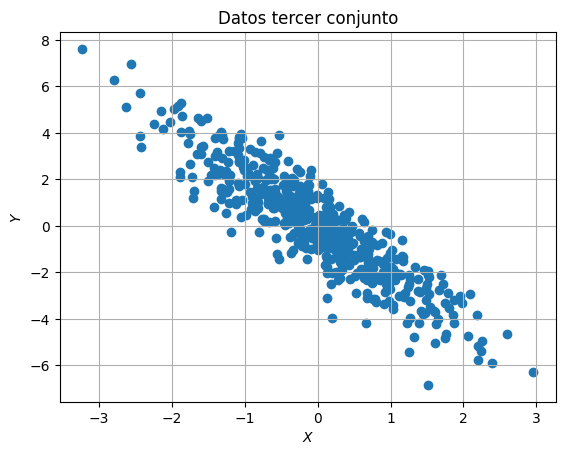

In [6]:
plt.figure()
plt.scatter(eje_x,data_y3)
plt.grid()
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.title("Datos tercer conjunto")
plt.show()

A continuación graficamos e imprimimos la matriz de covarianza:

In [7]:
cov_matrix = np.cov(eje_x,data_y3)
print(cov_matrix)

[[ 1.00843284 -2.09772358]
 [-2.09772358  5.35205749]]


En este caso, la relación entre las variables es inversamente proporcional y el valor de $Y$ disminuye a medida que aumenta $X$.De ahí que la covarianza es negativa.

# **3. Ejemplo con datos reales:**

Aquí tenemos las observaciones reales de temperatura (en °C) y humedad (en \%) en un invernadero. Observe la gráfica de los datos presentados a continuación (**Nota:** Asegúrese de cargar el archivo *greenhouse.csv* antes de ejecutar la celda de código):

In [8]:
import pandas as pd

handle = pd.read_csv("greenhouse.csv",sep=";",usecols=["T (°)","H (%)"])
handle.columns = ["Temperatura","Humedad"]

<Axes: title={'center': 'Humedad vs Temperatura'}, xlabel='Temperatura (°C)', ylabel='Humedad(%)'>

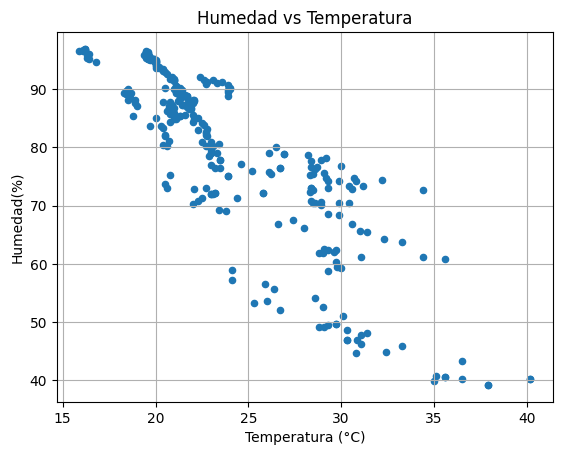

In [9]:
handle.plot.scatter("Temperatura","Humedad",grid=True,title="Humedad vs Temperatura",xlabel="Temperatura (°C)",ylabel="Humedad(%)")

Observe que, a través de una inspección visual de los datos, existe una relación lineal entre la temperatura y humedad. Si vemos estas dos variables como variables aleatorias, podemos estimar la covarianza y analizar su relación estadística a través de este momento estadístico.

A continuación se define una función que halla la covarianza entre dos variables:

In [10]:
def covarianza(X1,X2):
  mu_1 = sum(X1)/len(X1)
  mu_2 = sum(X2)/len(X2)
  cov = 0
  for i in range(len(X1)):
    cov += (X1[i] - mu_1)*(X2[i] - mu_2)
  cov /= (len(X1)-1)
  return cov

Por último, la covarianza entre las dos variables es la siguiente:

In [11]:
cov = covarianza(handle["Temperatura"],handle["Humedad"])
print(f"Covarianza entre temperatura y humedad: {cov}")

Covarianza entre temperatura y humedad: -63.56876695652172


Así, se observa que la covarianza entre las dos variables es negativa, lo cual es consistente con la gráfica donde se observa que una variable disminuye a medida que aumenta la otra.

# **Ejercicios**

**1.** En el archivo Temp_CO2.txt se encuentras las mediciones reales de:
*   Anomalías de temperatura anual (Temp °C). Estas anomalías se calculan como la diferencia entre la temperatura observada y la temperatura estimada por un modelo, en el periodo 1961 a 1990.
*   Concentración anual de CO2 (CO2 ppm) medido en Mauna Loa Observatory, Hawaii, en el periodo 1961 a 1990.


Genere tres gráficas:  Temp vs CO2, Temp vs year, y CO2 vs year. Analice los resultados.


 **Nota:** Asegurese de cargar primero el archivo *Temp_CO2.txt*.

**2.** Tome los valores de Temp y CO2, y calcule la matriz de covarianza usando la función *cov* de numpy e imprímala.

**3.** Analice sus resultados, ¿Qué información se puede interpretar respecto a la temperatura y el nivel de CO2 a través de los años?